In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
participants = ['P1','P2','P3','P4']
modalités = ['odeur','musique']
valence = ['positive','négative']
dtype = ['ECG','resp_nasale','resp_ventrale','GSR']
srate = 1000
duration = 400
time = np.arange(0, duration, 1/srate)

In [3]:
shape = ( len(participants), len(modalités), len(valence) , len(dtype) , time.size ) 
data = np.zeros(shape)

In [4]:
da_lucile = xr.DataArray(data=data, dims = ['participant','modalité','valence','dtype','time'], coords = {'participant':participants , 'modalité':modalités, 'valence':valence, 'dtype':dtype , 'time':time})

In [5]:
da_lucile

<xarray.DataArray (participant: 4, modalité: 2, valence: 2, dtype: 4, time: 400000)>
array([[[[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]]],


        [[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]]]],
...
       [[[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]]],


        [[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]]]]])
Coordinates:
  * participant  (participant) <U2 'P1' 'P2' 'P3' 'P4'
  * modalité     (modalité) <U7 'odeur' 'musique'
  * valence      (valence) <U8 'positive' 'négative'
  * dtype        (dtype) <U13 'ECG' 'resp_nasale' 'resp_ventrale' 'GSR'
  * time         (time) float64 0.0 0.001 0.002 0.003 ... 400.0 400.0 400.0

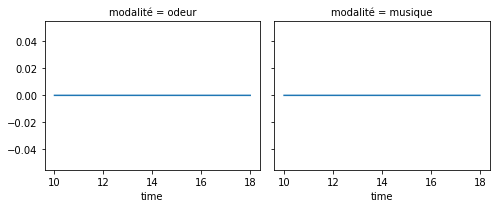

In [6]:
da_lucile.loc[:,:,'positive','ECG',10:18].mean('participant').plot.line(x='time', col = 'modalité')

In [7]:
da_lucile.sel(participant = 'P1')#.mean('participant').plot.line(x='time', col = 'modalité')

<xarray.DataArray (modalité: 2, valence: 2, dtype: 4, time: 400000)>
array([[[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]],


       [[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]]])
Coordinates:
    participant  <U2 'P1'
  * modalité     (modalité) <U7 'odeur' 'musique'
  * valence      (valence) <U8 'positive' 'négative'
  * dtype        (dtype) <U13 'ECG' 'resp_nasale' 'resp_ventrale' 'GSR'
  * time         (time) float64 0.0 0.001 0.002 0.003 ... 400.0 400.0 400.0

In [8]:
starts = np.arange(0, duration , 20)

In [9]:
starts

array([  0,  20,  40,  60,  80, 100, 120, 140, 160, 180, 200, 220, 240,
       260, 280, 300, 320, 340, 360, 380])

In [10]:
concat = []
for start in starts:
    concat.append(da_lucile.sel(time = slice(start , start + 5)))


In [11]:
len(concat)

20

In [12]:
da_lucile_epoched = xr.concat(concat , dim = 'epoch')

In [15]:
da_lucile_epoched = da_lucile_epoched.assign_coords({'epoch':np.arange(1,len(concat)+1, 1)})

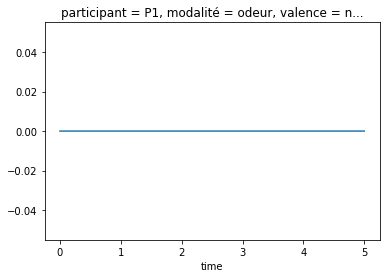

In [19]:
da_lucile_epoched.loc[1,'P1','odeur','négative','ECG',:].plot()

In [20]:
da_lucile_epoched

<xarray.DataArray (epoch: 20, participant: 4, modalité: 2, valence: 2, dtype: 4, time: 100020)>
array([[[[[[ 0.,  0.,  0., ..., nan, nan, nan],
           [ 0.,  0.,  0., ..., nan, nan, nan],
           [ 0.,  0.,  0., ..., nan, nan, nan],
           [ 0.,  0.,  0., ..., nan, nan, nan]],

          [[ 0.,  0.,  0., ..., nan, nan, nan],
           [ 0.,  0.,  0., ..., nan, nan, nan],
           [ 0.,  0.,  0., ..., nan, nan, nan],
           [ 0.,  0.,  0., ..., nan, nan, nan]]],


         [[[ 0.,  0.,  0., ..., nan, nan, nan],
           [ 0.,  0.,  0., ..., nan, nan, nan],
           [ 0.,  0.,  0., ..., nan, nan, nan],
           [ 0.,  0.,  0., ..., nan, nan, nan]],

          [[ 0.,  0.,  0., ..., nan, nan, nan],
           [ 0.,  0.,  0., ..., nan, nan, nan],
           [ 0.,  0.,  0., ..., nan, nan, nan],
           [ 0.,  0.,  0., ..., nan, nan, nan]]]],
...
        [[[[nan, nan, nan, ...,  0.,  0.,  0.],
           [nan, nan, nan, ...,  0.,  0.,  0.],
           [nan, nan, nan, ...,  0.,  0.,  0.],
           [nan, nan, nan, ...,  0.,  0.,  0.]],

          [[nan, nan, nan, ...,  0.,  0.,  0.],
           [nan, nan, nan, ...,  0.,  0.,  0.],
           [nan, nan, nan, ...,  0.,  0.,  0.],
           [nan, nan, nan, ...,  0.,  0.,  0.]]],


         [[[nan, nan, nan, ...,  0.,  0.,  0.],
           [nan, nan, nan, ...,  0.,  0.,  0.],
           [nan, nan, nan, ...,  0.,  0.,  0.],
           [nan, nan, nan, ...,  0.,  0.,  0.]],

          [[nan, nan, nan, ...,  0.,  0.,  0.],
           [nan, nan, nan, ...,  0.,  0.,  0.],
           [nan, nan, nan, ...,  0.,  0.,  0.],
           [nan, nan, nan, ...,  0.,  0.,  0.]]]]]])
Coordinates:
  * time         (time) float64 0.0 0.001 0.002 0.003 ... 385.0 385.0 385.0
  * participant  (participant) <U2 'P1' 'P2' 'P3' 'P4'
  * modalité     (modalité) <U7 'odeur' 'musique'
  * valence      (valence) <U8 'positive' 'négative'
  * dtype        (dtype) <U13 'ECG' 'resp_nasale' 'resp_ventrale' 'GSR'
  * epoch        (epoch) int64 1 2 3 4 5 6 7 8 9 ... 12 13 14 15 16 17 18 19 20